# Mapeos

La función $f(x) = 2x$ es la regla que asigna a cada numero $x$, un numero 2 veces mas largo. Este es un modelo matemático simple. Podríamos imaginar que $x$ denota la poblacion de bacterias en un laboratorio de cultivo y que $f(x)$ denota la poblacion una hora más tarde. Entonces, la regla expresa el hecho de que la poblacion se duplica cada hora. Si el cultivo tiene una poblacion inicial de $10^4$ bacterias, entonces, despues de una hora tendrá $f(10000) = 20000$ baterias y despues de 2 horas tendrá $f(f(10000))$ = 40000$ bacterias y así sucesibamente. 

Un sistema dinámico consiste de un conjunto de reglas y de estados iniciales que determinan estados futuros en términos de los estados pasados. Por ejemplo, $x_n = f(x_{n-1})$ denota la regla de crecimiento de una poblacion de bacterias, si se conoce el estado anterior. En este ejemplo, $n$ denota el tiempo. En el limite donde la diferencia entre tiempos tiende a 0, el modelo se vuelve una ecuacion diferencial. En otro caso se trata de un mapeo. 

Si el modelo matemático incluye una componente aleatoria, diremos que se trata de un sistema estocástico y no de uno dinámico. Ya en la práctica de movimiento Browniano estudiaron un poco un modelo estocástico. 

# Gráfica de Cobweb 

Ya hemos usado esta clase de gráficas para estudiar el mapeo logístico anteriormete, pero no lo habíamos definido. 

Una gráfica de Cobweb consite en graficar la función del mapeo $f(x)$, graficar la recta identidad $y = x$ y después graficar la trayectoria que sigue nuestro mapeo dada una condición inicial. El primer punto será $(x_0,0)$, el segundo será $(x_0, f(x_0)=x_1)$, el siguiente será $(x_1, x_1)$, seguido de $(x_1, x_2)$ y así sucesivamente. 

[1] Haz una funcion de funciones, que pida como argumentos el mapeo, el valor inicial y el numero de pasos y te produzca una gráfica de Cobweb. 

In [1]:
include("Metodos2.jl")
using PyPlot

function Cobwebplot(f::Function, x0,n)
    X = Float64[x0]
    Y = Float64[0]
    x = x0
    for i in 1:n
        x0 = copy(x)
        x = f(x)
        push!(X,x0)
        push!(Y,x)
        push!(X,x)
        push!(Y,x)
    end
    xmax = maximum(X)
    xmax +=.1
    X1 = 0:0.001:xmax
    plot(X1,X1)
    plot(X1,map(f,X1))
    plot(X,Y)
end

Cobwebplot (generic function with 1 method)

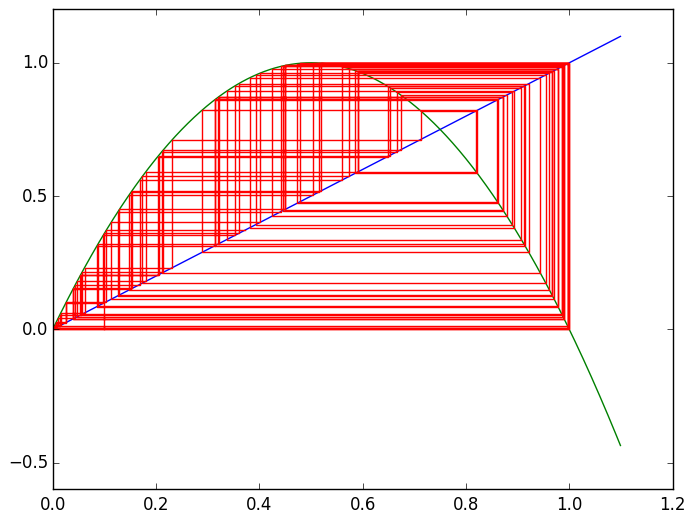

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31fc5a690>

In [2]:
f(x) = 4x*(1-x)
Cobwebplot(f, 0.1, 100)

# Puntos fijos

Los puntos fijos de un mapeo $f$ son aquello que cumplen con la siguiente condición: $f(x_0) = x_0$. Estos puntos pueden ser atractores o fuentes, es decir, que si se inicia cerca de uno de ellos nuestro mapeo tenderá a acercarnos a esos puntos, o a alejarnos. 

Primero que nada, necesitamos identificar qué puntos son fijos en un mapeo. ¿Cómo lo hacemos? La respuesta es: mirando la gráfica de Cobweb. La interescción de nuestra funcion mapeo, con la recta identidad, nos da los puntos fijos. Si se inicia en ellos, se mantendrá uno en ellos. 

El segundo paso es buscar la estabilidad del sistema, es decir, si se trata de puntos atractores o fuentes. 

Observemos qué sucede en el mapeo logístico con los dos puntos fijos.

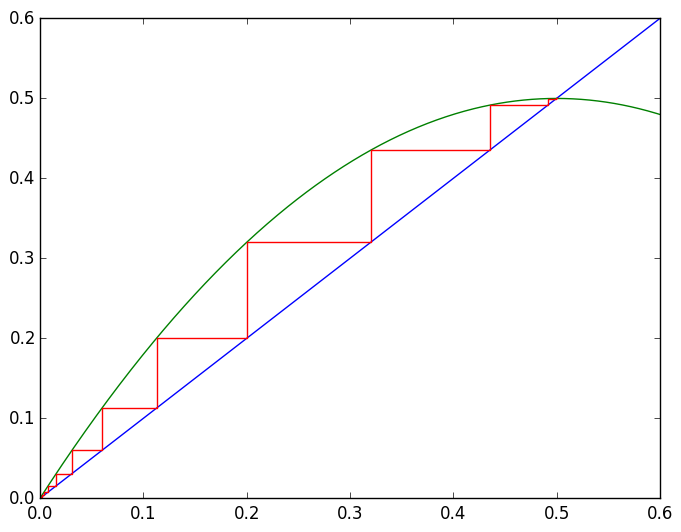

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31fea92d0>

In [3]:
f(x) = 2x*(1-x)
Cobwebplot(f, 0.001, 100)

En este caso, se ve claramente que el mapeo se aleja del origen y se acerca al otro punto fijo. Analizando un poco, podemos deducir que cuando $f'(x_0)<0$ el punto será atractor, y será funete en el caso inverso. Sólo en el caso donde la derivada es 0, tendremos dudas de qué sucede. 

# Orbitas con periodo p.

Ya tienen un par de herramientas poderosísimas para analizar esta clase de sistemas, pero ¿qué hay de los puntos que no son fijos, pero que son parte de una órbita periódica? ¿Cómo podemos analizarlos?

La respuesta es sencilla. Si se quiere buscar orbitas de periodo $p$, lo que tenemos que revisar no es el mapeo $f$, sino $f^p$. 

Por ejemplo, si queremos estudiar las órbitas de periodo 2 del mapeo logístico, en vez de buscar la intersección entre la recta identidad y la función del mapeo, buscamos la intersección entre la identidad y el mapeo evaluado 2 veces. 

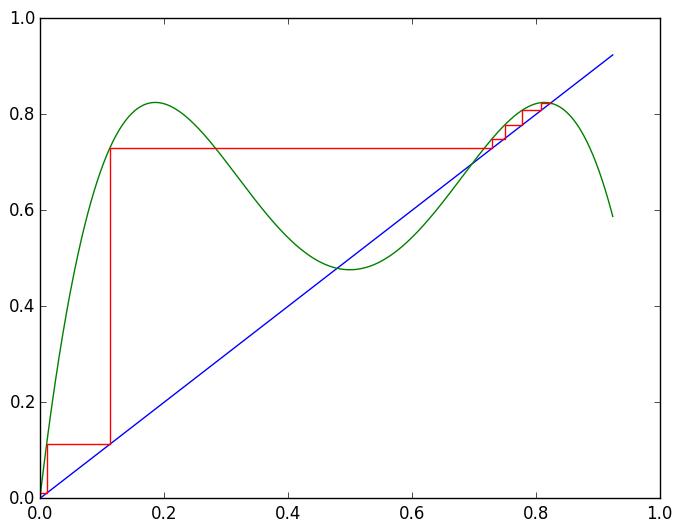

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3202a8910>

In [4]:
f(x) = 3.3x*(1-x)
f2(x) = f(f(x))
Cobwebplot(f2, 0.001, 100)

En este ejemplo vemos que hay intersección con 3 puntos, dos de ellos ya sabemos que se refieren a puntos fijos, pero hay un tercero que tiene que corresponder a un punto de periodo 2. 

Igual que en el caso de los puntos fijos, la estabilidad de las órbitas periódicas, se puede estudiar mediante la deribada, esta vez, de $f^p(x_0)$. 

# Orden de los periodos

Uno puede intuir (aunque no lo demostremos), que si hay periodo 2, entonces habrá puntos fijos y que si hay periodo 4, entonces habrá periodo 2 y también puntos fijos (periodo 1). Al respecto, existe un famoso teorema, conocido como el Teorema de Sharkovsky. En el se establece el siguiente orden para los periodos: 

$1<2<4<2^3<...<2^n<...<7 2^4 < 5 2^4 < 3 2^4 < ... < 7 2^3 < 5 2^3 < 3 2^3 <...< 7 < 5< 3$ 

Entonces, si un sistema tiene periodo $p$, tendrá también todos los periodos menores a $p$ en ese orden. De entrada, podemos ver que el periodo 3 es de particular importancia, pues se establece que si un mapeo tiene periodo 3, entonces tiene orbitas de absolutamente todos los periodos. 

Busquemos entonces, órbitas de periodo 3 en nuestro mapeos. Ellas nos dirán algo interesante del sistema. 

[2] Busca, en el mapeo logístico, si puedes encontrar para que valores existen órbitas de periodo 3. 

[3] Una vez que las encuentres, calcula numéricamente el valor de la órbita y la estabilidad del punto. 


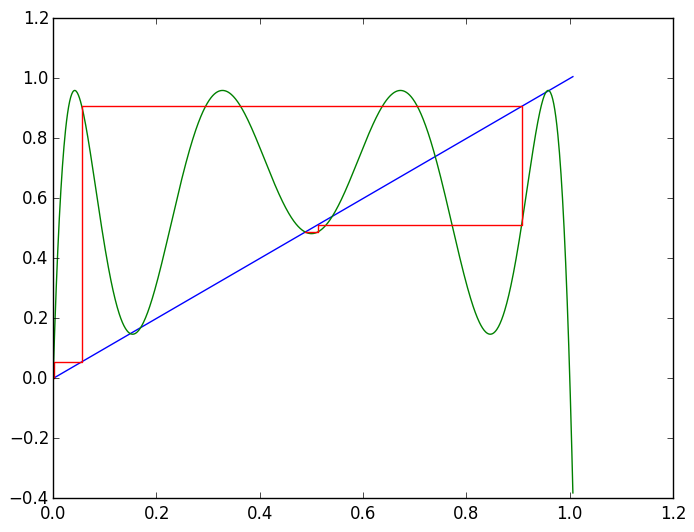

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3204b7690>

In [5]:
f(x) = 3.84x*(1-x)
f2(x) = f(f(x))
f3(x) = f(f2(x))
g(x) = f3(x)-x
Cobwebplot(f3, 0.001, 100)

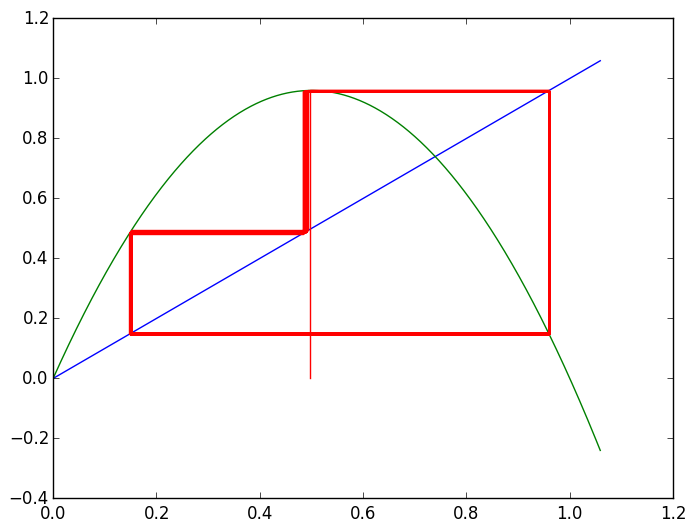

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32078ded0>

In [6]:
x0 = Newton2(g, 0.5) 

Cobwebplot(f, x0+0.01, 100)

# Sensibilidad  de un mapeo 

Sea $f$ un mapeo en $\mathbb{R}$. Un punto $x_0$ tiene sensibilidad sobre las condiciones iniciales, si hay una distancia $d>0$ tal que cualquier punto $x$, arbitrariamente cercano a $x_0$ eventualmente es mapeado una distacia por lo menos $d$ unidades de la correspondiente imagen de $x_0$. 


# Periodo 3 implica caos

Hemos llegado al momento clave de esta clase. Demostrarmos conjuntamente que el que haya periodo 3 en un sistema dinámico, implica que se pierde la memoria de forma exponencial (o bien, que el exponente de Lyapunov es positivo). 

La demostración la haremos conjuntamente en pasos y repetiremos con ello el resultado de Li and Yorke publicado en 1975 en la revista "The American Mathematical Monthly". La idea de la demostración es mostrar que si hay periodo 3, hay sensibilidad a condiciones iniciales. 

Primero asumiremos que el mapeo es unimodal. Es decir, que tiene un solo máximo, tal como el caso mostrado arriba con el mapeo logístico. Ahora, dividiremos en 2 los posibles valores iniciales, los que van de $A$ a $B$ y los que van de $B$ a $C$. (Dibujo en el pizzarrón)

La existencia de un periodo 3 y la continuidad del mapeo $f$ juntos garantizan que la imagen del intervalo $[A, B]$ cubre  $[B, C]$; Más a un $f([B, C]) =  [A, C]$.

**Paso 1**: Encuentra las reglas de itinerario de cada región. ¿Se puede mapear todo el segmento $[A,C]$?

**Paso 2**: Dibuja el itinerario para los primeros 5 pasos. 

**Paso 3**: Sea d el tamaño del subintervalo $RR$. Denota por $J  = S_1 S_2 ...S_k R$ cualquier subintervalo que termine con $R$. Muestra que J contiene un par de puntos uno en el intervalo $ S_1 S_2 ...S_k RRL$ y otro en el intervalo $ S_1 S_2 ...S_k RLR$ que eventualmente se mapean una distancia al menos $d$. 

**paso 4**: Muestra que dentro del intervalo $J$ hay 3 subintervalos del tipo $ S_1 S_2 ...S_k R S_{k+2} S_{k+3} R$. Explica por que al menos 2 de ellos tienen longitud menor que la mitad de J. 

**paso 5**: Combina los paso 3 y 4 para mostrar que el intervalo $J$ contiene un subintervalo de la forma $ J_1 = S_1 S_2 ...S_k R S_{k+2} S_{k+3} RLR$ con la siguiente propiedad: cada punto $x$ de $J_1$ tiene una vecindad $y$ dentro de un espacio de tamaño $length(J)/2$ cuya distancia por parejas sobre la iteración eventualmente supera d. 

**paso 6**: Sea $h = A-C$ la distancia del intervalo original. Muestra que para cada entero positivo $k$ existen $2^k$ subintervalos disjuntos (denotedos por una secuencia of $5k-1$ simbolos) de longitud menor que $2^{-k} h$ cada uno de los cuales tiene sensitividad a las condiciones iniciales. Por lo tanto, hay invinitos puntos sensibles. 

**paso 7**: Cuantifica el número de los puntos sensibles de la siguiente manera: Parea los itinerarios con la representación de los números en su forma binaria. Esto significa que la cardinalidad de los puntos sensibles es igual que la de los números reales. 

**paso 8**: Hasta ahora, nos basamos en la figura puesta en el pizzarrón. ¿Qué otras posibilidades hay para el caso unimodal? Generaliza la demostración a esos casos.  

**paso 9**: Finalmente, explica como generalizar el método de demostración para curvas multimodales. ¿Qué se modifica?
